### <h1 style="font-size: 30px; text-align: center">STARTUP PROFIT PREDICTOR SYSTEM</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

### No Null Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


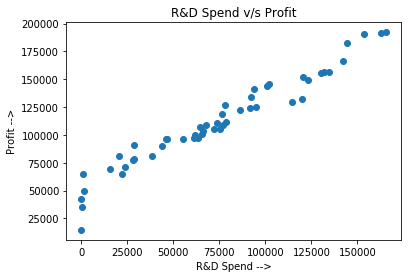

In [7]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title("R&D Spend v/s Profit")
plt.xlabel("R&D Spend -->")
plt.ylabel("Profit -->")
plt.show()   # Linearity b/w R&D Spend and Profit

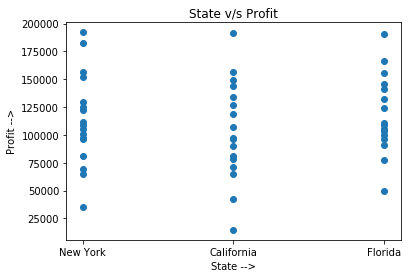

In [8]:
plt.scatter(df['State'],df['Profit'])
plt.title("State v/s Profit")
plt.xlabel("State -->")
plt.ylabel("Profit -->")
plt.show()

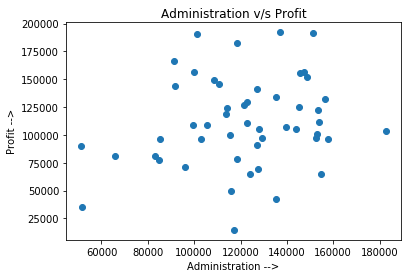

In [9]:
plt.scatter(df['Administration'],df['Profit'])
plt.title("Administration v/s Profit")
plt.xlabel("Administration -->")
plt.ylabel("Profit -->")
plt.show()              # Graph is More Scattered

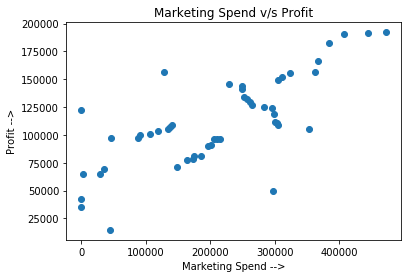

In [10]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title("Marketing Spend v/s Profit")
plt.xlabel("Marketing Spend -->")
plt.ylabel("Profit -->")
plt.show()                        # Linearity b/w Marketing Spend and Profit

In [11]:
import seaborn as sns

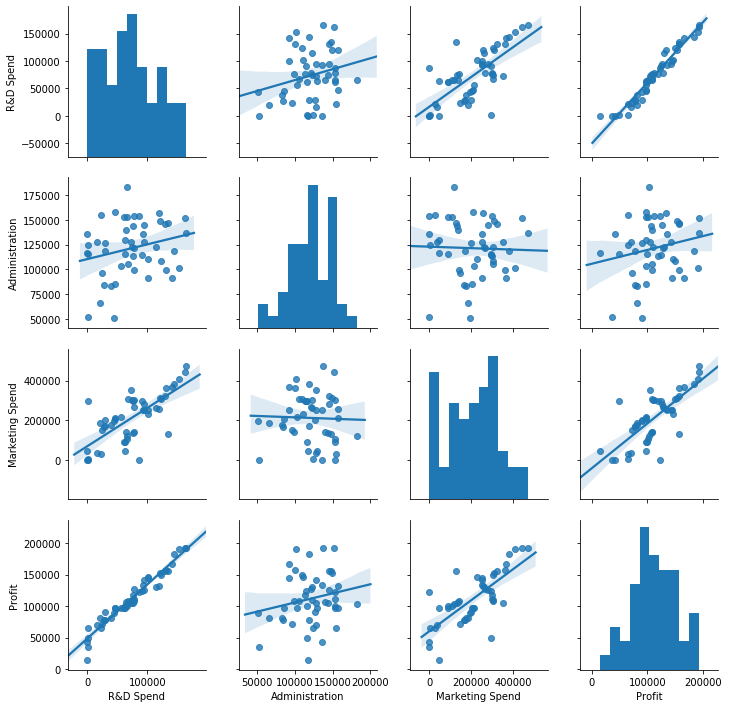

In [12]:
sns.pairplot(df,kind='reg')

### So From Above Graphical Visualisations we can see that "R&D Spend" and "Marketing Spend" is showing linearity with "Profit"

In [13]:
x= df[['R&D Spend','Marketing Spend']]
y= df['Profit']

In [14]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [15]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.25,random_state = 45)

In [18]:
trainx.head()

,R&D Spend,Marketing Spend
40,28754.33,172795.67
44,22177.74,28334.72
36,28663.76,201126.82
49,0.00,45173.06
25,64664.71,137962.62


In [19]:
trainy.head()

40     78239.91
44     65200.33
36     90708.19
49     14681.40
25    107404.34
Name: Profit, dtype: float64

### Evaluation

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Model Score: {}'.format(round(model.score(testx,testy)*100,2)))

Model Score: 97.71


In [24]:
ypred = model.predict(testx)

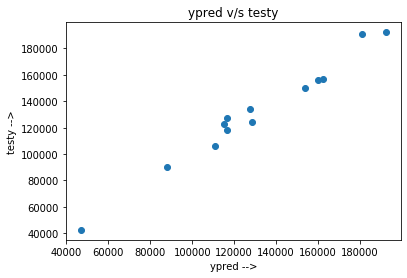

In [25]:
plt.scatter(ypred,testy)
plt.xlabel('ypred -->')
plt.ylabel('testy -->')
plt.title('ypred v/s testy')
plt.show()

### Deployment

In [26]:
pd.to_pickle(model,'StartupProfitPredictor')

In [27]:
final_model = pd.read_pickle('StartupProfitPredictor')
final_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
RandD_Spend = eval(input('Enter money invested in R&D:'))
Marketing_Spend = eval(input('Enter money invested in Marketing:'))
query = pd.DataFrame({'R&D Spend':[RandD_Spend],'Marketing Spend':[Marketing_Spend]})


Enter money invested in R&D:162597.7
Enter money invested in Marketing:471784.1


In [33]:
query

,R&D Spend,Marketing Spend
0,162597.7,471784.1


In [38]:
print("Profit earned: {} $".format(round(final_model.predict(query)[0],2)))

Profit earned: 190004.55 $
